# Regression Models in R (tips)

In [1]:
if(!exists("Table1", mode="function")) source("mechkar.R")

In [2]:

library(readr)
library(dplyr)
library(ggplot2)


Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.0.2"


In [3]:
df <- read.csv("train.csv")
head(df)
dim(df)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


[1] 365  12

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# EDA

In [4]:
df$holiday <- as.factor(df$holiday)
df$season <- as.factor(df$season)
df$mnth <- as.factor(df$mnth)
df$workingday <- as.factor(df$workingday)
df$weathersit <- as.factor(df$weathersit)
df$weekday <- as.factor(df$weekday)
summary(df)

       id      season      mnth     holiday weekday workingday weathersit
 Min.   :  1   1:90   1      : 31   0:355   0:52    0:115      1:226     
 1st Qu.: 92   2:92   3      : 31   1: 10   1:52    1:250      2:124     
 Median :183   3:94   5      : 31           2:52               3: 15     
 Mean   :183   4:89   7      : 31           3:52                         
 3rd Qu.:274          8      : 31           4:52                         
 Max.   :365          10     : 31           5:52                         
                      (Other):179           6:53                         
      temp             atemp              hum           windspeed      
 Min.   :0.05913   Min.   :0.07907   Min.   :0.0000   Min.   :0.02239  
 1st Qu.:0.32500   1st Qu.:0.32195   1st Qu.:0.5383   1st Qu.:0.13558  
 Median :0.47917   Median :0.47285   Median :0.6475   Median :0.18690  
 Mean   :0.48666   Mean   :0.46684   Mean   :0.6437   Mean   :0.19140  
 3rd Qu.:0.65667   3rd Qu.:0.61238   3rd Qu.:0.7

# DATASET PARTITION

In [5]:
tab1 <- train_test(data=df, train_name="train", test_name="test", prop=0.7, seed=5, tableone=TRUE)
tab1

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


  |===========================                                           |  38%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |=================================================================     |  92%

 

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),183.7 (105.0),181.4 (107.2),NA
id,Median (IQR),183.0 (92.0-274.0),181.0 (92.5-272.5),184.5 (88.0-277.0),0.854
season,1,90 (24.7%),62 (24.3%),28 (25.5%),NA
season,2,92 (25.2%),67 (26.3%),25 (22.7%),0.914
season,3,94 (25.8%),65 (25.5%),29 (26.4%),NA
season,4,89 (24.4%),61 (23.9%),28 (25.5%),NA
mnth,1,31 (8.5%),20 (7.8%),11 (10.0%),NA
mnth,2,28 (7.7%),18 (7.1%),10 (9.1%),0.841


In [6]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [7]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


## SVM

In [10]:
#install.packages("liquidSVM")
library(liquidSVM)



Warning message:
"package 'liquidSVM' was built under R version 4.0.3"


In [11]:
cnames = names(train)
cnames <- cnames[c(2:11)]

variables_comb <- list()

# length(combn(cnames,3))
# combn(cnames,3)

counter <-  0
for(i in 1:10) {
    curr_combs <- combn(cnames,i)
    for(j in 1:(length(curr_combs)/i)){
        counter <- counter + 1
        curr_comb <- data.frame(curr_combs[,j])
        variables_comb[counter] <- curr_comb
    }
}   


In [13]:
# install.packages("svMisc")
require(svMisc)

Loading required package: svMisc

Warning message:
"package 'svMisc' was built under R version 4.0.3"

Attaching package: 'svMisc'


The following object is masked from 'package:utils':

    ?




In [14]:

err_res <- NULL
counter <- 0
for(curr_vars in variables_comb){
    
    counter <- counter + 1
    progress(counter)
    
    outcome <- "cnt"
    variables <- curr_vars
    f <- as.formula( paste(outcome,  paste(variables, collapse = " + "), sep = " ~ "))

    mod9 <- svm(f, train)
    
    pred9 <- predict(mod9, newdata=test)

    rmse(test$cnt,pred9)
    rmsle(test$cnt,pred9)
    err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod9", 
                                         RMSE=rmse(test$cnt,pred9), 
                                         RMSLE=rmsle(test$cnt,pred9)))
    }



Progress:   1%Progress:   2%Progress:   3%Progress:   4%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   5%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   6%Progress:   7%Progress:   8%Progress:   9%Progress:  10%Progress:  11%Progress:  12%Progress:  13%Progress:  14%Progress:  15%Progress:  16%Progress:  17%Progress:  18%Progress:  19%Progress:  20%Progress:  21%Progress:  22%Progress:  23%Progress:  24%Progress:  25%Progress:  26%Progress:  27%Progress:  28%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  29%Progress:  30%Progress:  31%Progress:  32%Progress:  33%Progress:  34%Progress:  35%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  36%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  37%Progress:  38%Progress:  39%Progress:  40%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  41%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  42%Progress:  43%Progress:  44%Progress:  45%Progress:  46%Progress:  47%Progress:  48%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  49%Progress:  50%Progress:  51%Progress:  52%Progress:  53%Progress:  54%Progress:  55%Progress:  56%Progress:  57%Progress:  58%Progress:  59%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  60%Progress:  61%Progress:  62%Progress:  63%Progress:  64%Progress:  65%Progress:  66%Progress:  67%Progress:  68%Progress:  69%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  70%Progress:  71%Progress:  72%Progress:  73%Progress:  74%Progress:  75%Progress:  76%Progress:  77%Progress:  78%Progress:  79%Progress:  80%Progress:  81%Progress:  82%Progress:  83%Progress:  84%Progress:  85%Progress:  86%Progress:  87%Progress:  88%Progress:  89%Progress:  90%Progress:  91%Progress:  92%Progress:  93%Progress:  94%Progress:  95%Progress:  96%Progress:  97%Progress:  98%Progress:  99%Progress: 100%              

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_l

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again

In [15]:
err_res

Name,Model,RMSE,RMSLE
<chr>,<chr>,<dbl>,<dbl>
SVM,mod9,974.9266,0.4075944
SVM,mod9,826.2856,0.3662656
SVM,mod9,1409.7782,0.5622616
SVM,mod9,1417.7276,0.5677238
SVM,mod9,1416.1981,0.5701585
SVM,mod9,1348.2061,0.5370777
SVM,mod9,839.0090,0.3656615
SVM,mod9,819.1057,0.3560870
SVM,mod9,1331.7764,0.5349431


In [16]:

err_res_df <- bind_rows(err_res, .id = "id")
err_res_df[order(err_res_df$RMSLE),]

,id,Name,Model,RMSE,RMSLE
,<chr>,<chr>,<chr>,<dbl>,<dbl>
951,1,SVM,mod9,515.6608,0.1991515
1023,1,SVM,mod9,478.4875,0.2010297
1008,1,SVM,mod9,489.3796,0.2046203
1017,1,SVM,mod9,486.1169,0.2048870
957,1,SVM,mod9,501.0341,0.2083758
912,1,SVM,mod9,506.1716,0.2112880
727,1,SVM,mod9,516.5622,0.2116338
977,1,SVM,mod9,497.1339,0.2121859
993,1,SVM,mod9,509.1496,0.2148992


In [17]:
best_comb <- variables_comb[951]

In [18]:
# specifications of how to model,
# coming from somewhere else
outcome <- "cnt"
variables <- c("season","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed")
best_comb <- unlist(best_comb)

f <- as.formula(
  paste(outcome, 
        paste(best_comb, collapse = " + "), 
        sep = " ~ "))
print(f)


cnt ~ mnth + holiday + workingday + temp + atemp + hum + windspeed


In [19]:
mod9 <- svm(f, train)
mod9

SVM model on 7 features (cookie=1024)
 Scenario: LS
 Formula:  cnt ~ mnth + holiday + workingday + temp + atemp + hum + windspeed
  trained and selected on a 10x10 grid

In [20]:
pred9 <- predict(mod9,newdata=test)

rmse(test$cnt,pred9)
rmsle(test$cnt,pred9)


[1] 547.2434

[1] 0.2471913

In [21]:
real_test <- read.csv("test.csv")
head(real_test)
dim(real_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908


[1] 366  11

In [22]:
real_test$holiday <- as.factor(real_test$holiday)
real_test$season <- as.factor(real_test$season)
real_test$mnth <- as.factor(real_test$mnth)
real_test$workingday <- as.factor(real_test$workingday)
real_test$weathersit <- as.factor(real_test$weathersit)
real_test$weekday <- as.factor(real_test$weekday)

In [23]:

real_test$cnt <- predict(mod9,newdata=real_test)
real_test_sub <- real_test %>% select(id, cnt)

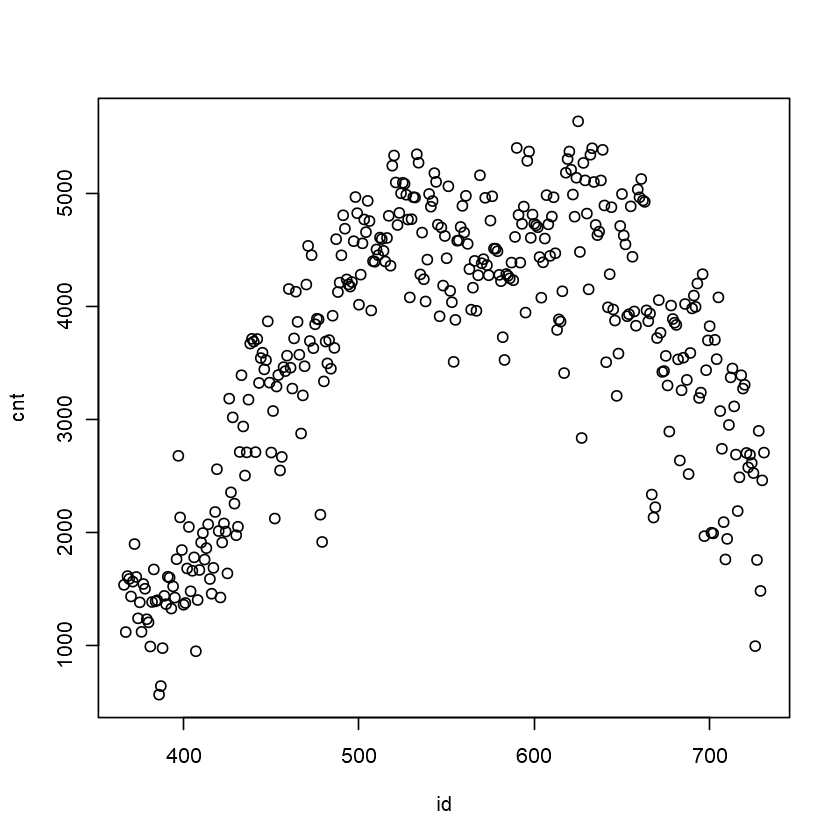

In [24]:


plot(real_test_sub)

In [25]:
write.csv(real_test_sub,"C:\\Users\\ytsat\\Documents\\DataScience\\ML\\Kaggle_Challenge\\SVM_v1.csv", row.names = FALSE)